In [ ]:
import tensorflow as t
import numpy as n
import matplotlib.pyplot as p
import imageio

In [ ]:
(trainX, trainY), (testX, testY) = t.keras.datasets.mnist.load_data()
trainX = trainX / 255
testX = testX / 255

In [ ]:
print(trainX.shape, 'train shape')
print(testX.shape, 'test shape')

(60000, 28, 28) train shape
(10000, 28, 28) test shape


In [ ]:
trainY = t.keras.utils.to_categorical(trainY, 10)
testY = t.keras.utils.to_categorical(testY, 10)

In [ ]:
model = t.keras.models.Sequential([
    t.keras.layers.Conv2D(
        input_shape=(28,28,1),
        filters=32,
        kernel_size=(5,5),
        padding='same',
        activation='relu'
    ), 
    t.keras.layers.MaxPool2D(pool_size=(2,2)),
    t.keras.layers.Conv2D(
        filters=64,
        kernel_size=(5,5),
        padding='same',
        activation='relu'
    ), 
    t.keras.layers.MaxPool2D(pool_size=(2,2)),
    t.keras.layers.Flatten(),
    t.keras.layers.Dense(1000, activation=t.nn.relu),
    t.keras.layers.Dropout(0.3),
    t.keras.layers.Dense(10, activation=t.nn.softmax)                                    
])

In [ ]:
model.compile(loss=t.keras.losses.categorical_crossentropy, optimizer=t.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
history = model.fit(trainX.reshape(-1, 28, 28, 1), trainY,batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 190s 101ms/step - loss: 0.1031 - accuracy: 0.9678
Epoch 2/10
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0386 - accuracy: 0.9887
Epoch 3/10
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0267 - accuracy: 0.9913
Epoch 4/10
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0207 - accuracy: 0.9933
Epoch 5/10
1875/1875 [==============================] - 188s 100ms/step - loss: 0.0155 - accuracy: 0.9950
Epoch 6/10
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0127 - accuracy: 0.9961
Epoch 7/10
1875/1875 [==============================] - 189s 101ms/step - loss: 0.0119 - accuracy: 0.9963
Epoch 8/10
1875/1875 [==============================] - 188s 100ms/step - loss: 0.0104 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0095 - accuracy: 0.9972
Epoch 10/10
1875/1875 [=======================

In [ ]:
print(model.evaluate(testX.reshape(-1, 28, 28, 1), testY))

313/313 [==============================] - 8s 27ms/step - loss: 0.0258 - accuracy: 0.9932
[0.025789957493543625, 0.9932000041007996]


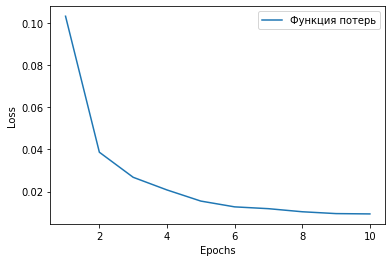

In [ ]:
loss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)
p.plot(epochs, loss_values, label='Функция потерь')
p.xlabel('Epochs')
p.ylabel('Loss')
p.legend()
p.show()

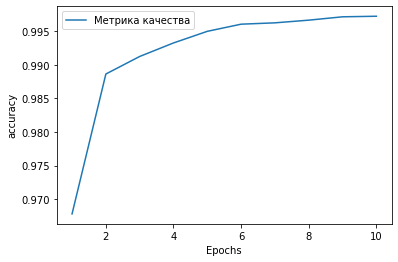

In [ ]:
accu_values = history.history['accuracy']
epochs = range(1, len(accu_values)+1)
p.plot(epochs, accu_values, label='Метрика качества')
p.xlabel('Epochs')
p.ylabel('accuracy')
p.legend()
p.show()

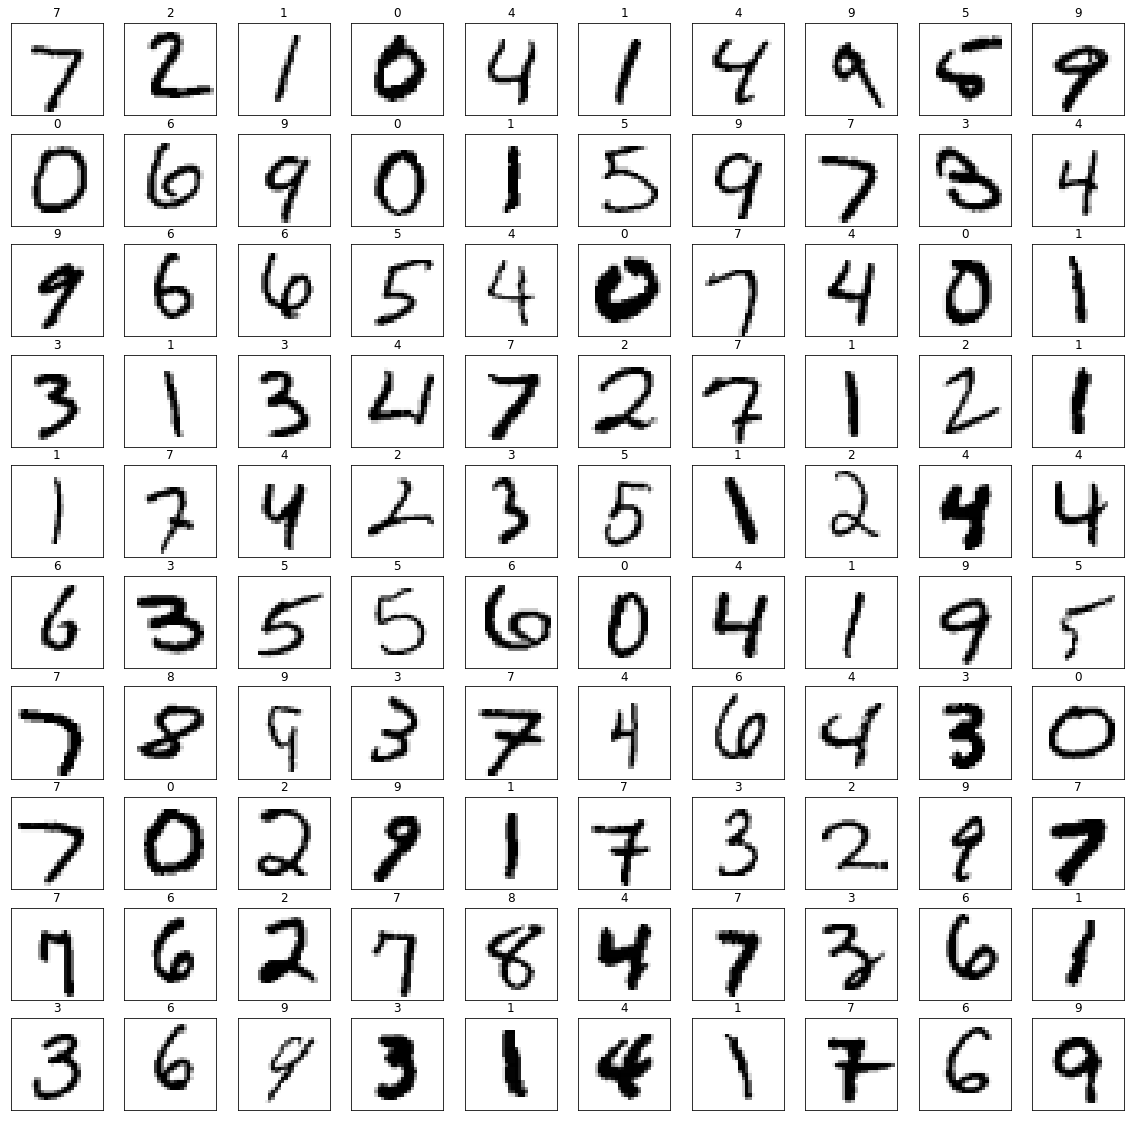

In [ ]:
p.figure(figsize=(20,20))
for i in range(100):
  p.subplot(10,10, i+1)
  p.xticks([])
  p.yticks([])
  pic = n.expand_dims(testX[i], axis = 0)
  ot = model.predict(pic.reshape(-1, 28, 28, 1))
  p.imshow(testX[i], cmap=p.cm.binary)
  p.title(n.argmax(ot))